# Chapter 2 - Statistical Rethinking

In [39]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


In [40]:
stats.binom.pmf(6,n=9,p=0.5)


0.16406250000000006

In [41]:
# Define grid
grid = np.linspace(0,1,20)

In [42]:
prior = np.repeat(1, 20) 
prior2=(grid>=0.5).astype(int)
prior3=np.exp(-5*np.abs(grid - 0.5))

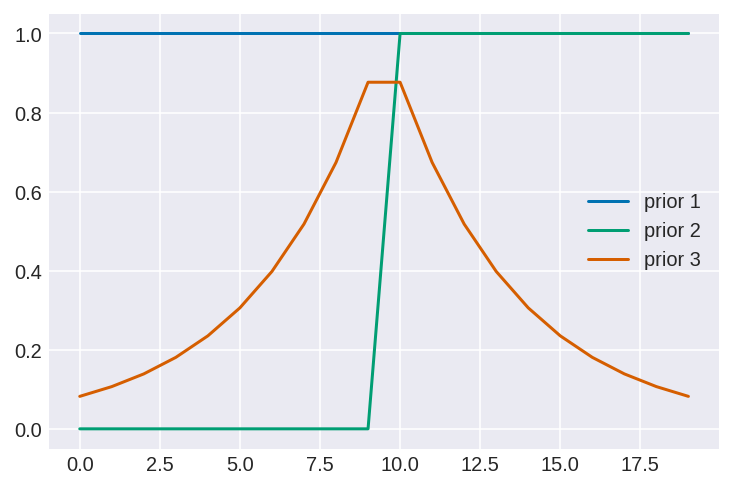

In [43]:
plt.plot(prior,label='prior 1')
plt.plot(prior2, label = 'prior 2')
plt.plot(prior3, label='prior 3')

plt.legend()

In [44]:
likelihood = stats.binom.pmf(6,n=9,p=grid)

In [45]:
likelihood

array([0.00000000e+00, 1.51814898e-06, 8.18509295e-05, 7.77292279e-04,
       3.59857537e-03, 1.11609461e-02, 2.66829865e-02, 5.29210991e-02,
       9.08269760e-02, 1.38341326e-01, 1.89768623e-01, 2.36114658e-01,
       2.66611252e-01, 2.71400562e-01, 2.45005089e-01, 1.89768623e-01,
       1.17918118e-01, 5.02667021e-02, 8.85384487e-03, 0.00000000e+00])

In [46]:
posterior = likelihood*prior
posterior = posterior/np.sum(posterior)

In [47]:
posterior
grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

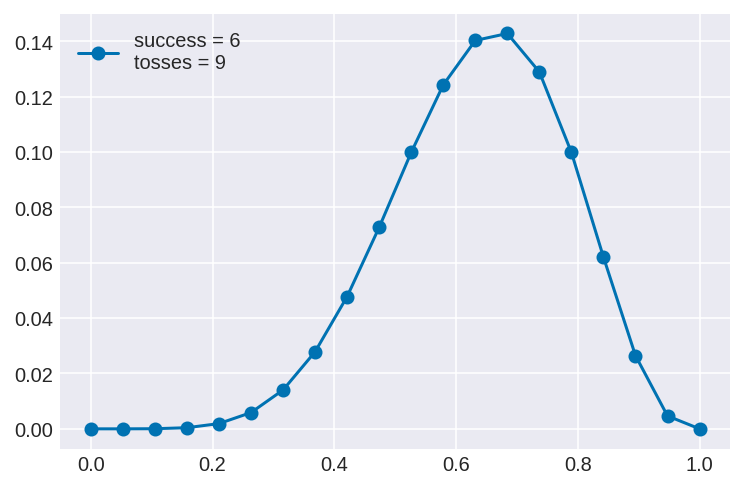

In [48]:
plt.plot(grid,posterior,'-o',label='success = {}\ntosses = {}'.format(6, 9))

plt.legend(loc='best')

In [49]:
data = np.repeat((0, 1), (3, 6))

In [50]:
with pm.Model() as normal_approximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]
mean_q['p'], std_q

logp = -1.8075, ||grad|| = 1.5: 100%|██████████| 7/7 [00:00<00:00, 2046.43it/s]


(array(0.66666667), array([0.15713484]))

In [11]:
norm = stats.norm(mean_q, std_q)
prob = .89
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z 
pi

array([0.41553484, 0.91779849])

In [19]:
# Analytical calculation
w = 6
n = 9
x = np.linspace(0,1,100)
beta = stats.beta.pdf(x,w+1,n-w+1)

In [36]:
norm = stats.norm.pdf(x,loc=mean_q['p'], scale=std_q)

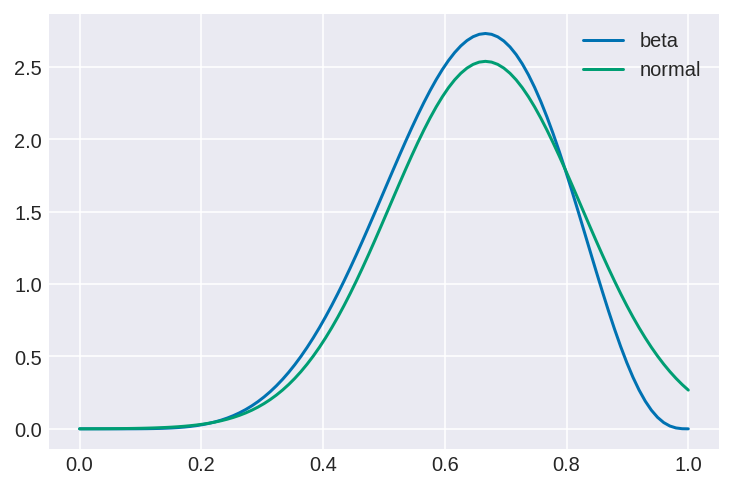

In [38]:
plt.plot(x,beta,label='beta')
plt.plot(x,norm,label='normal')
plt.legend()